# Assignment05
# This script demonstrates the Computation of Image Features using Convolution
# Name : Lee Gyu Hyeong
# Student ID : 20122208
# Link to github : https://github.com/GyuHyeong/assignment05.git

# Import packages for plotting images and manipulating images

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy import signal
from skimage import io, color
from skimage import exposure

# Define kernels for computing image gradients, smoothing image and my own purpose

In [2]:
'''
kernel for computing the derivative in x-direction
kernel for computing the derivative in y-direction
kernel for computing smoothing image
kernel for computing my own purpose(kernel for computing the derivative 
    in x-direction and y-direction at the same time )
'''
ker_xdir=np.array([[0,0,0],[-1,0,1],[0,0,0]]) 
ker_ydir=np.array([[0,1,0],[0,0,0],[0,-1,0]]) 
ker_smoothing=np.array([[1/16,2/16,1/16],[2/16,4/16,2/16],[1/16,2/16,1/16]]) 
ker_my=np.array([[0,0,1],[0,0,0],[-1,0,0]])

# Define a function for computing the magnitude of the gradient. Will compute by this way $f(x)=\sqrt{g_x^2+g_y^2}$

In [3]:
"""
Function for computing the magnitude of the gradient
"""
def magnitudeOfGradient(x,y):
    im=np.zeros((x.shape[0],x.shape[1]))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            im[i,j]=sqrt(x[i,j]**2+y[i,j]**2)
    plt.imshow(im,cmap='gray')
    plt.title("absolute value(magnitude) of gradient")
    plt.axis('off')
    plt.show()

# Define a function for computing the direction of the gradient $\theta=tan^{-1}(\frac{g_y}{g_x})$

In [4]:
"""
Function for computing the direction of the gradient
"""
def directionOfGradient(x,y):
    im=np.zeros((x.shape[0],x.shape[1]))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if(x[i,j]!=0):
                im[i,j]=np.arctan(y[i,j]/x[i,j])
            else:  
                im[i,j]=np.arctan(y[i,j]/(1/255)) 
    plt.imshow(im,cmap='gray')
    plt.title("direction of gradient")
    plt.axis('off')
    plt.show()

# Compute convolutions and plot the images

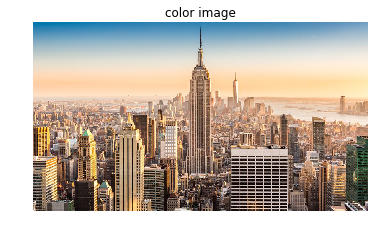

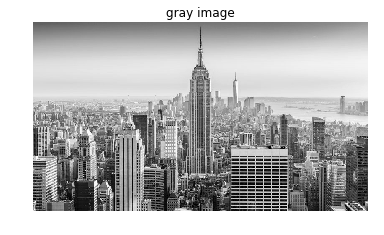

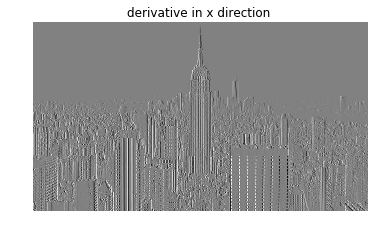

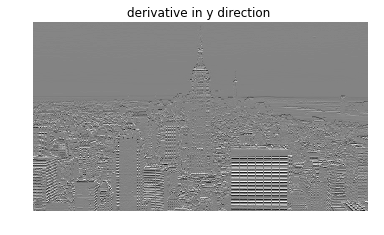

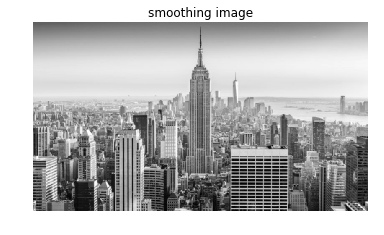

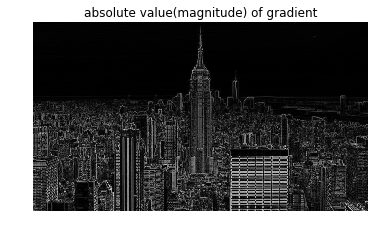

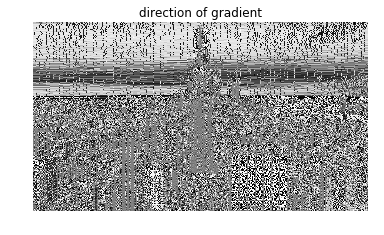

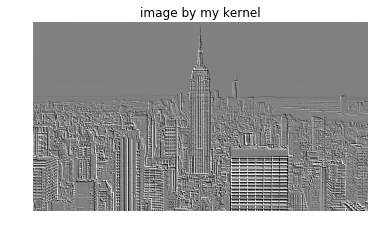

In [5]:
file_image = 'newyork.jpg'

im_color = io.imread(file_image)
im_gray  = color.rgb2gray(im_color) #change to the grayscale

#compute convolutions
im_conv_xdir=signal.convolve2d(im_gray, ker_xdir, boundary='symm', mode='same')
im_conv_ydir=signal.convolve2d(im_gray, ker_ydir, boundary='symm', mode='same')
im_conv_smoo=signal.convolve2d(im_gray, ker_smoothing, boundary='symm', mode='same')
im_conv_my=signal.convolve2d(im_gray, ker_my, boundary='symm', mode='same')


plt.imshow(im_color)
plt.title("color image")
plt.axis('off')
plt.show()

plt.imshow(im_gray,cmap='gray')
plt.title("gray image")
plt.axis('off')
plt.show()

plt.imshow(im_conv_xdir,cmap='gray')
plt.title("derivative in x direction ")
plt.axis('off')
plt.show()

plt.imshow(im_conv_ydir,cmap='gray')
plt.title("derivative in y direction ")
plt.axis('off')
plt.show()

plt.imshow(im_conv_smoo,cmap='gray')
plt.title("smoothing image")
plt.axis('off')
plt.show()

#plot the image's absolute value(magnitude) of gradient
magnitudeOfGradient(im_conv_xdir,im_conv_ydir)

#plot the image's direction of gradient
directionOfGradient(im_conv_xdir,im_conv_ydir)

#plot the image convolution by my own kernel
plt.imshow(im_conv_my,cmap='gray')
plt.title("image by my kernel")
plt.axis('off')
plt.show()